In [29]:
from sklearn.model_selection import train_test_split
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
support_data = pd.read_csv('/content/train_support_12s_only - resample_pos_neg (1).csv',na_values='.')
df = support_data

cols = df.select_dtypes(include='object').columns
df[cols]=df[cols].astype('category')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [16]:
!pip install auto-sklearn

In [41]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120)
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

/usr/local/lib/python3.7/dist-packages/autosklearn/data/feature_validator.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype('category')
/usr/local/lib/python3.7/dist-packages/autosklearn/data/feature_validator.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype('category')
/usr/local/lib/python3.7/dist-packages/autosklearn/data/feature_validator.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [18]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1])

In [19]:
pd.DataFrame(predictions).to_csv('automlpredictions.csv')

In [20]:
pd.DataFrame(y_test).to_csv('automlpredictions_y.csv')

In [21]:
cls.predict_proba(X_test)
pd.DataFrame(y_test).to_csv('automlpredictions_probability_y.csv')

/usr/local/lib/python3.7/dist-packages/autosklearn/data/feature_validator.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype('category')


In [22]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.classification
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))


Accuracy score: 0.6177474402730375


In [23]:
print(cls.leaderboard())


          rank  ensemble_weight           type      cost  duration
model_id                                                          
14           1             0.58       adaboost  0.400517  2.998121
5            2             0.08            lda  0.413437  5.666739
29           3             0.04  random_forest  0.413437  3.969080
25           4             0.02  random_forest  0.416021  4.726810
2            5             0.02  random_forest  0.418605  5.797064
23           6             0.20  random_forest  0.418605  3.625542
21           7             0.06            mlp  0.452196  3.620351


In [24]:
print(cls.sprint_statistics())


auto-sklearn results:
  Dataset name: f3ae9264-d3c7-11ec-81b7-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.599483
  Number of target algorithm runs: 29
  Number of successful target algorithm runs: 23
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 2



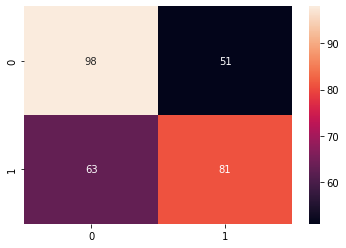

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
f = sns.heatmap(cm, annot=True, fmt='d')

In [44]:
# Precision of class 1
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average=None)[1]

0.6136363636363636

/usr/local/lib/python3.7/dist-packages/autosklearn/data/feature_validator.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype('category')


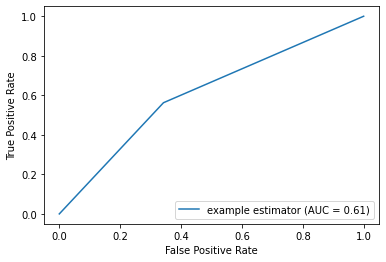

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
#y = np.array([0, 0, 1, 1])
#pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y_test, cls.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()